In [5]:
import pandas as pd
from pathlib import Path
import datetime as dt
import matplotlib.pyplot as plt
import hvplot.pandas
import time

In [6]:
# Read the raw dataset
file_path = "../Database/Resources/14100443.csv"
data = pd.read_csv(file_path, on_bad_lines="skip")
data.sample(3)


,REF_DATE,GEO,DGUID,National Occupational Classification,Job vacancy characteristics,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
23996738,2018-10,Saskatchewan,2021A000247,"Camera, platemaking and other prepress occupat...",90 days or more,Average offered hourly wage,Dollars,81,units,0,v1570914291,9.802.28.5,NaN,..,NaN,NaN,2
12258923,2016-10,Nunavut,2021A000262,Silviculture and forestry workers [84111],"Minimum experience level sought, all levels",Average offered hourly wage,Dollars,81,units,0,v1571454637,14.745.17.5,NaN,..,NaN,NaN,2
3398821,2015-07,Nova Scotia,2021A000212,"Business, finance and administration occupatio...",Part-time,Job vacancies,Number,223,units,0,v1570259990,4.3.3.1,235.0,E,NaN,NaN,0


In [7]:
print(data.shape)

(55234368, 17)


In [8]:
df=data.copy()

In [9]:
# Determine the columns and their corresponding data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55234368 entries, 0 to 55234367
Data columns (total 17 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   REF_DATE                              object 
 1   GEO                                   object 
 2   DGUID                                 object 
 3   National Occupational Classification  object 
 4   Job vacancy characteristics           object 
 5   Statistics                            object 
 6   UOM                                   object 
 7   UOM_ID                                int64  
 8   SCALAR_FACTOR                         object 
 9   SCALAR_ID                             int64  
 10  VECTOR                                object 
 11  COORDINATE                            object 
 12  VALUE                                 float64
 13  STATUS                                object 
 14  SYMBOL                                float64
 15  TERMINATED   

<h1><span style="color:green"> 1. Exploring columns </span></h1>

In [10]:
# Exploring columns
df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'National Occupational Classification',
       'Job vacancy characteristics', 'Statistics', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [11]:
len(df['REF_DATE'].unique())

36

In [12]:
df['REF_DATE'].value_counts().sort_index(ascending=True)

REF_DATE
2015-01    1534288
2015-04    1534288
2015-07    1534288
2015-10    1534288
2016-01    1534288
2016-04    1534288
2016-07    1534288
2016-10    1534288
2017-01    1534288
2017-04    1534288
2017-07    1534288
2017-10    1534288
2018-01    1534288
2018-04    1534288
2018-07    1534288
2018-10    1534288
2019-01    1534288
2019-04    1534288
2019-07    1534288
2019-10    1534288
2020-01    1534288
2020-10    1534288
2021-01    1534288
2021-04    1534288
2021-07    1534288
2021-10    1534288
2022-01    1534288
2022-04    1534288
2022-07    1534288
2022-10    1534288
2023-01    1534288
2023-04    1534288
2023-07    1534288
2023-10    1534288
2024-01    1534288
2024-04    1534288
Name: count, dtype: int64

In [13]:
# Exploring columns
print(len(df.GEO.unique()))
df.GEO.value_counts()

14


GEO
Canada                       3945312
Newfoundland and Labrador    3945312
Prince Edward Island         3945312
Nova Scotia                  3945312
New Brunswick                3945312
Quebec                       3945312
Ontario                      3945312
Manitoba                     3945312
Saskatchewan                 3945312
Alberta                      3945312
British Columbia             3945312
Yukon                        3945312
Northwest Territories        3945312
Nunavut                      3945312
Name: count, dtype: int64

In [14]:
# Exploring columns
print(len(df.DGUID.unique()))
print(df.DGUID.value_counts())

14
DGUID
2021A000011124    3945312
2021A000210       3945312
2021A000211       3945312
2021A000212       3945312
2021A000213       3945312
2021A000224       3945312
2021A000235       3945312
2021A000246       3945312
2021A000247       3945312
2021A000248       3945312
2021A000259       3945312
2021A000260       3945312
2021A000261       3945312
2021A000262       3945312
Name: count, dtype: int64


In [15]:
# Exploring columns
print(len(df['National Occupational Classification'].unique()))
df['National Occupational Classification'].value_counts()

824


National Occupational Classification
Total, all occupations                                                                                 67032
Technical industrial trades [721]                                                                      67032
Contractors and supervisors, pipefitting trades [72012]                                                67032
Contractors and supervisors, carpentry trades [72013]                                                  67032
Contractors and supervisors, other construction trades, installers, repairers and servicers [72014]    67032
                                                                                                       ...  
Managers in education [4002]                                                                           67032
Administrators - post-secondary education and vocational training [40020]                              67032
School principals and administrators of elementary and secondary education [40021]         

In [16]:
# # Exploring columns
print(len(df['Job vacancy characteristics'].unique()))
# df['Job vacancy characteristics'].value_counts()

47


In [17]:
# Exploring columns
print(len(df.Statistics.unique()))
print(df.Statistics.value_counts())

3
Statistics
Job vacancies                  19934208
Proportion of job vacancies    19934208
Average offered hourly wage    15365952
Name: count, dtype: int64


In [18]:
# Exploring columns
print(len(df.UOM.unique()))
print(df.UOM.value_counts())

3
UOM
Number     19934208
Percent    19934208
Dollars    15365952
Name: count, dtype: int64


In [19]:
# Exploring columns
print(len(df.UOM_ID.unique()))
print(df.UOM_ID.value_counts())

3
UOM_ID
223    19934208
239    19934208
81     15365952
Name: count, dtype: int64


In [20]:
# Exploring columns
print(len(df.SCALAR_FACTOR.unique()))
print(df.SCALAR_FACTOR.value_counts())

1
SCALAR_FACTOR
units    55234368
Name: count, dtype: int64


In [21]:
# Exploring columns
print(len(df.SCALAR_ID.unique()))
print(df.SCALAR_ID.value_counts())

1
SCALAR_ID
0    55234368
Name: count, dtype: int64


In [22]:
# Exploring columns
print(len(df.VECTOR.unique()))
print(df.VECTOR.value_counts())

1534288
VECTOR
v1569930942    36
v1570981765    36
v1570981771    36
v1570981770    36
v1570981769    36
               ..
v1570455136    36
v1570455135    36
v1570455134    36
v1570455133    36
v1571357218    36
Name: count, Length: 1534288, dtype: int64


In [23]:
# Exploring columns
print(len(df.COORDINATE.unique()))
print(df.COORDINATE.value_counts())

1534288
COORDINATE
1.1.1.1        36
10.485.46.5    36
10.485.48.5    36
10.485.48.2    36
10.485.48.1    36
               ..
5.646.15.5     36
5.646.15.2     36
5.646.15.1     36
5.646.14.5     36
14.12.44.2     36
Name: count, Length: 1534288, dtype: int64


In [24]:
# Exploring columns
print(len(df.VALUE.unique()))
print(df.VALUE.value_counts())

15172
VALUE
0.0         2710254
100.0       2172905
5.0          219757
10.0         153536
15.0         140738
             ...   
139225.0          1
400535.0          1
136145.0          1
426545.0          1
108.2             1
Name: count, Length: 15171, dtype: int64


In [25]:
# Exploring columns
print(len(df.STATUS.unique()))
print(df.STATUS.value_counts())

9
STATUS
..    24689775
F     13313275
A      2624686
E      2511601
D      2495251
x      1902074
B      1780946
C      1365491
Name: count, dtype: int64


In [26]:
# Exploring columns
print(len(df.SYMBOL.unique()))
print(df.SYMBOL.value_counts())

1
Series([], Name: count, dtype: int64)


In [27]:
# Exploring columns
print(len(df.TERMINATED.unique()))
print(df.TERMINATED.value_counts())

2
TERMINATED
t    4983552
Name: count, dtype: int64


In [28]:
# Exploring columns
print(len(df.DECIMALS.unique()))
print(df.DECIMALS.value_counts())

3
DECIMALS
0    19934208
1    19934208
2    15365952
Name: count, dtype: int64


In [29]:
# Keep acceptable data quality 
df = df.loc[(df['STATUS'] == 'A')|(df['STATUS'] == 'B')|(df['STATUS'] == 'C')|(df['STATUS'] == 'D')]

In [30]:
# Dropping unneeded columns from table
df = df.drop(columns=['DGUID','UOM_ID','SCALAR_FACTOR','SCALAR_ID','VECTOR','COORDINATE','STATUS','SYMBOL',\
                      'UOM','TERMINATED','DECIMALS'])


In [31]:
# Dropping the duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


In [32]:
# Dropping the missing or null values.
print(df.isnull().sum())

REF_DATE                                0
GEO                                     0
National Occupational Classification    0
Job vacancy characteristics             0
Statistics                              0
VALUE                                   0
dtype: int64


<h1><span style="color:green"> 2. Exploring Statistics column: Job Vacancies </span></h1>

In [33]:
job_vacancies = df.copy()

In [34]:
# Filter number of vacancies
job_vacancies = job_vacancies.loc[job_vacancies['Statistics'] == 'Job vacancies'] 
job_vacancies.shape

(2098576, 6)

In [35]:
# Handle Missing Data
job_vacancies.dropna(subset = ["VALUE"], inplace=True)
print(job_vacancies.shape)
print(job_vacancies.sample(1))

(2098576, 6)
        REF_DATE      GEO               National Occupational Classification  \
8376324  2016-04  Ontario  Student monitors, crossing guards and related ...   

        Job vacancy characteristics     Statistics  VALUE  
8376324             Company website  Job vacancies    5.0  


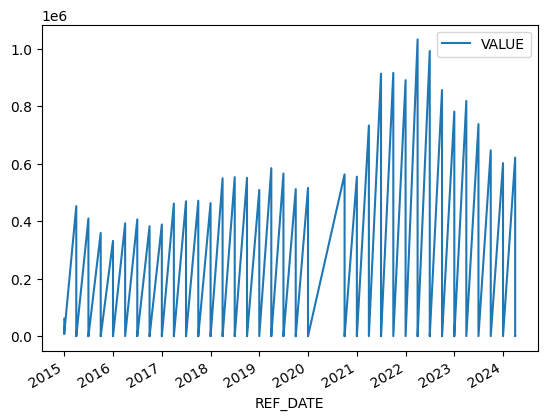

In [36]:
# Ploting Value
job_vacancies['REF_DATE'] = pd.to_datetime(job_vacancies['REF_DATE'], format='%Y-%m')
job_vacancies.plot(x='REF_DATE', y='VALUE')
plt.show()

In [37]:
# Total vacancies per province by ref date 
total_vacancies_by_location = job_vacancies.groupby(["GEO","REF_DATE"]).agg(total_vac=('VALUE','sum'))
total_vacancies_by_location

total_vac
GEO     REF_DATE             
Alberta 2015-04-01  5741165.0
        2015-07-01  4922110.0
        2015-10-01  4039060.0
        2016-01-01  2805135.0
        2016-04-01  3073915.0
...                       ...
Yukon   2023-04-01    23740.0
        2023-07-01    29565.0
        2023-10-01    21730.0
        2024-01-01    22345.0
        2024-04-01    38420.0

[492 rows x 1 columns]

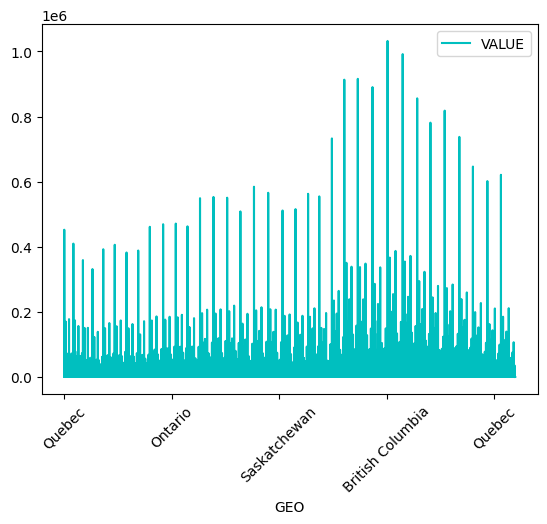

In [38]:
# Exploring GEO 
job_vacancies=job_vacancies.reset_index()
ax = plt.gca()
job_vacancies.plot(kind='line',x='GEO',y='VALUE', color='c', ax=ax)
plt.xticks(rotation=45)
plt.show()

In [39]:
# Filtering GEO.Canada
job_vacancies = job_vacancies.loc[job_vacancies.GEO != "Canada"]
job_vacancies.shape

(1525960, 7)

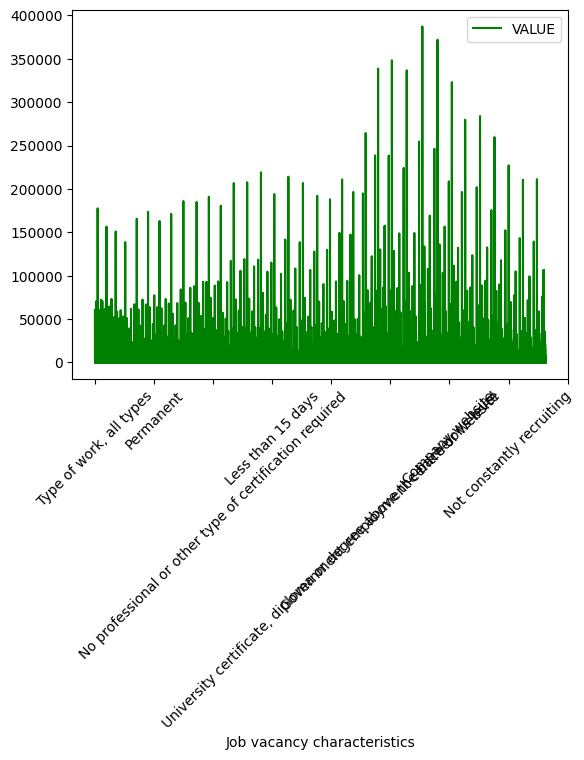

In [40]:
# Exploring Job vacancy characteristics
ax = plt.gca()
job_vacancies.plot(kind='line',x='Job vacancy characteristics',y='VALUE', color='green', ax=ax)
plt.xticks(rotation=45)
plt.show()

In [41]:
# Filtering Job Job vacancy characteristics
job_vacancies = job_vacancies.loc[(job_vacancies['Job vacancy characteristics'] == 'Full-time') | \
                          (job_vacancies['Job vacancy characteristics'] == 'Part-time')]

In [42]:
# Total Job_details vacancies by Date
# total_JobDetails = job_vacancies_noc1.groupby(["REF_DATE","Job vacancy characteristics"]).agg(total_vac=('VALUE','sum'))
# total_JobDetails

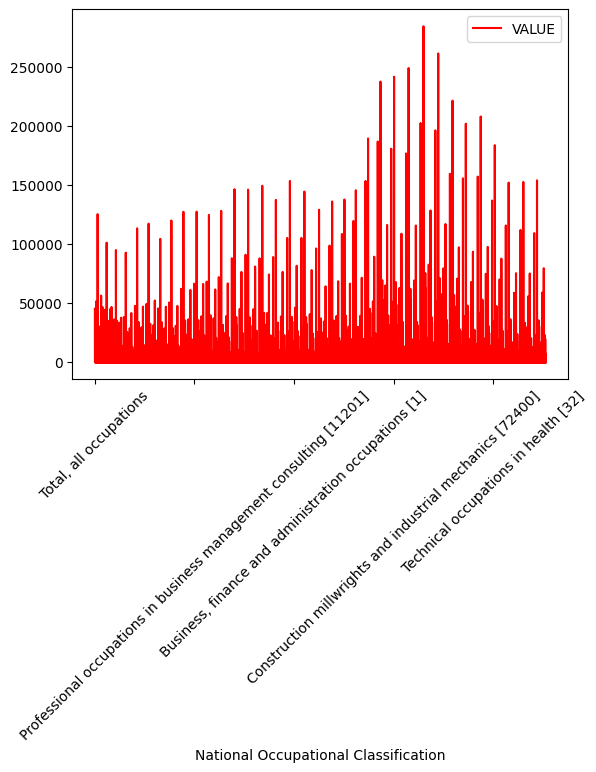

In [43]:
# Exploring Job vacancy characteristics
ax = plt.gca()
job_vacancies.plot(kind='line',x='National Occupational Classification',y='VALUE', color='red', ax=ax)
plt.xticks(rotation=45)
plt.show()

In [44]:
# Total NOC vacancies by Date
# total_NOC_vacancies = job_vacancies.groupby(["REF_DATE","National Occupational Classification"]).agg(total_vac=('VALUE','sum'))
# total_NOC_vacancies

In [45]:
# Filtering NOC 1 level
inc_list = ['Business, finance and administration occupations [1]', \
            'Health occupations [3]', \
            'Management occupations [0]', 'Natural and applied sciences and related occupations [2]', \
            'Natural resources, agriculture and related production occupations [8]', \
            'Occupations in art, culture, recreation and sport [5]', \
            'Occupations in education, law and social, community and government services [4]', \
            'Occupations in manufacturing and utilities [9]', \
            'Sales and service occupations [6]', \
            'Trades, transport and equipment operators and related occupations [7]']
job_vacancies = job_vacancies[job_vacancies['National Occupational Classification'].isin(inc_list)]

In [46]:
sorted(job_vacancies['National Occupational Classification'].unique().tolist())

['Business, finance and administration occupations [1]',
 'Health occupations [3]',
 'Natural and applied sciences and related occupations [2]',
 'Natural resources, agriculture and related production occupations [8]',
 'Occupations in art, culture, recreation and sport [5]',
 'Occupations in education, law and social, community and government services [4]',
 'Occupations in manufacturing and utilities [9]',
 'Sales and service occupations [6]',
 'Trades, transport and equipment operators and related occupations [7]']

In [47]:
job_vacancies.dropna(subset = ["VALUE"], inplace=True)
job_vacancies.shape

C:\Users\sanja\AppData\Local\Temp\ipykernel_6356\2356711685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_vacancies.dropna(subset = ["VALUE"], inplace=True)


(4918, 7)

In [48]:
job_vacancies.VALUE.describe()

count     4918.000000
mean      4162.777552
std       7904.663389
min          0.000000
25%        330.000000
50%       1095.000000
75%       3583.750000
max      75645.000000
Name: VALUE, dtype: float64

In [49]:
# Detecting Outliers by box plot vacancies. 
job_vacancies.hvplot.box(y='VALUE')

:BoxWhisker   (VALUE)

In [50]:
# Group Date_jv.Value
jv_noc_broad = job_vacancies.groupby(["REF_DATE"]).sum()["VALUE"]
jv_noc_broad

REF_DATE
2015-04-01     410030.0
2015-07-01     381645.0
2015-10-01     339260.0
2016-01-01     313245.0
2016-04-01     368010.0
2016-07-01     389575.0
2016-10-01     357945.0
2017-01-01     365045.0
2017-04-01     446580.0
2017-07-01     459595.0
2017-10-01     461250.0
2018-01-01     450640.0
2018-04-01     539580.0
2018-07-01     543295.0
2018-10-01     539150.0
2019-01-01     499380.0
2019-04-01     571800.0
2019-07-01     551700.0
2019-10-01     501350.0
2020-01-01     506250.0
2020-10-01     551575.0
2021-01-01     539980.0
2021-04-01     716780.0
2021-07-01     900795.0
2021-10-01     904290.0
2022-01-01     882895.0
2022-04-01    1022835.0
2022-07-01     978480.0
2022-10-01     842695.0
2023-01-01     771270.0
2023-04-01     806030.0
2023-07-01     723880.0
2023-10-01     638225.0
2024-01-01     588855.0
2024-04-01     608630.0
Name: VALUE, dtype: float64

In [51]:
# Calculating Total Canada / Total NOC / Total Job vacancy characteristics
# Filter number of vacancies
job_vacancies_ttl = df.copy()
job_vacancies_ttl = df.loc[df['Statistics'] == "Job vacancies"]
job_vacancies_ttl = job_vacancies_ttl.loc[job_vacancies_ttl['GEO'] == "Canada"] 
job_vacancies_ttl = job_vacancies_ttl.loc[job_vacancies_ttl['National Occupational Classification'] == "Total, all occupations"]
job_vacancies_ttl = job_vacancies_ttl.loc[job_vacancies_ttl['Job vacancy characteristics'] == "Type of work, all types"] 
job_vacancies_ttl

,REF_DATE,GEO,National Occupational Classification,Job vacancy characteristics,Statistics,VALUE
1534288,2015-04,Canada,"Total, all occupations","Type of work, all types",Job vacancies,452315.0
3068576,2015-07,Canada,"Total, all occupations","Type of work, all types",Job vacancies,409650.0
4602864,2015-10,Canada,"Total, all occupations","Type of work, all types",Job vacancies,359080.0
6137152,2016-01,Canada,"Total, all occupations","Type of work, all types",Job vacancies,331520.0
7671440,2016-04,Canada,"Total, all occupations","Type of work, all types",Job vacancies,392420.0
9205728,2016-07,Canada,"Total, all occupations","Type of work, all types",Job vacancies,406125.0
10740016,2016-10,Canada,"Total, all occupations","Type of work, all types",Job vacancies,382405.0
12274304,2017-01,Canada,"Total, all occupations","Type of work, all types",Job vacancies,388435.0
13808592,2017-04,Canada,"Total, all occupations","Type of work, all types",Job vacancies,461345.0
15342880,2017-07,Canada,"Total, all occupations","Type of work, all types",Job vacancies,469220.0


In [52]:
job_vacancies_ttl['REF_DATE'] = pd.to_datetime(job_vacancies_ttl['REF_DATE'], format='%Y-%m')

In [53]:
# Group Date_jv.ttl.Value
jv_ttl = job_vacancies_ttl.groupby(["REF_DATE"]).sum()["VALUE"]
jv_ttl 

REF_DATE
2015-04-01     452315.0
2015-07-01     409650.0
2015-10-01     359080.0
2016-01-01     331520.0
2016-04-01     392420.0
2016-07-01     406125.0
2016-10-01     382405.0
2017-01-01     388435.0
2017-04-01     461345.0
2017-07-01     469220.0
2017-10-01     471205.0
2018-01-01     462750.0
2018-04-01     549190.0
2018-07-01     553025.0
2018-10-01     550695.0
2019-01-01     508585.0
2019-04-01     584445.0
2019-07-01     565840.0
2019-10-01     511375.0
2020-01-01     515660.0
2020-10-01     562695.0
2021-01-01     554790.0
2021-04-01     732815.0
2021-07-01     913250.0
2021-10-01     915875.0
2022-01-01     890495.0
2022-04-01    1032215.0
2022-07-01     991835.0
2022-10-01     855965.0
2023-01-01     781250.0
2023-04-01     818135.0
2023-07-01     737555.0
2023-10-01     646365.0
2024-01-01     601755.0
2024-04-01     621085.0
Name: VALUE, dtype: float64

In [54]:
# difference in %
jv_difference =pd.merge(jv_noc_broad, jv_ttl, how='left', on=['REF_DATE'])
jv_difference['dif,%'] = round(((jv_difference.VALUE_y / jv_difference.VALUE_x)-1)*100)
jv_difference=jv_difference.rename(columns={'VALUE_y':'JV_by_TOTAL', 'VALUE_x':'JV_BroadNOC'})
jv_difference

,JV_BroadNOC,JV_by_TOTAL,"dif,%"
REF_DATE,,,
2015-04-01,410030.0,452315.0,10.0
2015-07-01,381645.0,409650.0,7.0
2015-10-01,339260.0,359080.0,6.0
2016-01-01,313245.0,331520.0,6.0
2016-04-01,368010.0,392420.0,7.0
2016-07-01,389575.0,406125.0,4.0
2016-10-01,357945.0,382405.0,7.0
2017-01-01,365045.0,388435.0,6.0
2017-04-01,446580.0,461345.0,3.0


<h1><span style="color:green"> 3. Average Hourly Wage </span></h1>

In [55]:
# Filtering Average Hourly Wage
avg_wage = df.loc[df['Statistics'] == "Average offered hourly wage"]
avg_wage.shape

(4162688, 6)

In [56]:
# Filtering GEO.Canada
avg_wage = avg_wage.loc[avg_wage.GEO != "Canada"]
avg_wage.shape

(3418126, 6)

In [57]:
# Filtering Job vacancy characteristics
avg_wage = avg_wage.loc[(avg_wage['Job vacancy characteristics'] == 'Full-time') | \
                          (avg_wage['Job vacancy characteristics'] == 'Part-time')]

In [58]:
# Filtering NOC 1 level
inc_list = ['Business, finance and administration occupations [1]', \
            'Health occupations [3]', \
            'Management occupations [0]', 'Natural and applied sciences and related occupations [2]', \
            'Natural resources, agriculture and related production occupations [8]', \
            'Occupations in art, culture, recreation and sport [5]', \
            'Occupations in education, law and social, community and government services [4]', \
            'Occupations in manufacturing and utilities [9]', \
            'Sales and service occupations [6]', \
            'Trades, transport and equipment operators and related occupations [7]']
avg_wage = avg_wage[avg_wage['National Occupational Classification'].isin(inc_list)]

In [59]:
# Handle Missing Data
avg_wage = avg_wage.dropna(subset=['VALUE'])

In [60]:
avg_wage.describe()

,VALUE
count,7103.000000
mean,22.341419
std,7.098401
min,10.500000
25%,16.800000
50%,21.150000
75%,26.700000
max,76.700000


In [61]:
# Detecting Outliers by box plot average_wage. 
avg_wage.hvplot.box(y='VALUE')

:BoxWhisker   (VALUE)

In [62]:
# Ploting average wage
avg_wage['REF_DATE'] = pd.to_datetime(avg_wage['REF_DATE'], format='%Y-%m')
avg_wage.hvplot(x='REF_DATE', y='VALUE', kind='scatter')

:Scatter   [REF_DATE]   (VALUE)

In [65]:
# Ensure 'VALUE' is numeric, coerce errors to NaN
avg_wage['VALUE'] = pd.to_numeric(avg_wage['VALUE'], errors='coerce')

# Drop NaN values from 'VALUE' column
avg_wage.dropna(subset=['VALUE'], inplace=True)

# Convert 'REF_DATE' to datetime format
avg_wage['REF_DATE'] = pd.to_datetime(avg_wage['REF_DATE'], format='%Y-%m')

# Group by 'REF_DATE' and calculate mean of 'VALUE'
avg_wage_sum = avg_wage.groupby('REF_DATE')['VALUE'].mean()

# Plot the average wage over time
avg_wage_sum.hvplot.line(x='REF_DATE', y='VALUE', title="Average Wage Over Time")


:Curve   [REF_DATE]   (VALUE)

In [66]:
# Average hourly wage by characteristics
avg_wage.groupby(["REF_DATE","Job vacancy characteristics"]).agg(\
                                                                 total_vac=('VALUE','mean'))


total_vac
REF_DATE   Job vacancy characteristics           
2015-01-01 Full-time                    21.600000
           Part-time                    15.310714
2015-04-01 Full-time                    22.509722
           Part-time                    16.868500
2015-07-01 Full-time                    22.661650
...                                           ...
2023-10-01 Part-time                    24.267647
2024-01-01 Full-time                    28.660680
           Part-time                    24.108000
2024-04-01 Full-time                    27.841204
           Part-time                    23.352830

[72 rows x 1 columns]

In [67]:
avg_wage_ft= avg_wage.loc[avg_wage["Job vacancy characteristics"]=='Full-time']
avg_wage_ft.describe()

,REF_DATE,VALUE
count,3656,3656.000000
mean,2019-09-22 21:02:45.426695680,24.759136
min,2015-01-01 00:00:00,10.550000
25%,2017-04-01 00:00:00,19.237500
50%,2019-07-01 00:00:00,24.200000
75%,2022-04-01 00:00:00,29.150000
max,2024-04-01 00:00:00,62.350000
std,NaN,7.151099


In [68]:
avg_wage_pt= avg_wage.loc[avg_wage["Job vacancy characteristics"]=='Part-time']
avg_wage_pt.describe()

,REF_DATE,VALUE
count,3447,3447.000000
mean,2019-09-29 20:06:53.577023488,19.777111
min,2015-01-01 00:00:00,10.500000
25%,2017-04-01 00:00:00,15.500000
50%,2019-07-01 00:00:00,18.600000
75%,2022-04-01 00:00:00,22.800000
max,2024-04-01 00:00:00,76.700000
std,NaN,6.068468


In [69]:
avg_wage.groupby(["National Occupational Classification","REF_DATE"]).agg(\
                                                                          avg_wage=('VALUE','mean'))

avg_wage
National Occupational Classification               REF_DATE             
Business, finance and administration occupation... 2015-01-01  19.770000
                                                   2015-04-01  19.663462
                                                   2015-07-01  20.888000
                                                   2015-10-01  20.801923
                                                   2016-01-01  21.890000
...                                                                  ...
Trades, transport and equipment operators and r... 2023-04-01  25.613462
                                                   2023-07-01  25.813462
                                                   2023-10-01  25.680000
                                                   2024-01-01  26.996154
                                                   2024-04-01  25.636538

[324 rows x 1 columns]

<h1><span style="color:green"> 4. Percent Job Vacancies </span></h1>

In [70]:
# Filtering Proportion of job vacancies
perct_vacancies = df.loc[df['Statistics'] == "Proportion of job vacancies"] 

In [71]:
# Filtering GEO.Canada
perct_vacancies = perct_vacancies.loc[perct_vacancies.GEO != "Canada"]
perct_vacancies.shape

(1519569, 6)

In [72]:
# Filtering Job vacancy characteristics
perct_vacancies = perct_vacancies.loc[(perct_vacancies['Job vacancy characteristics'] == 'Full-time') | \
                          (perct_vacancies['Job vacancy characteristics'] == 'Part-time')]

In [73]:
# Filtering NOC 1 level
inc_list = ['Business, finance and administration occupations [1]', \
            'Health occupations [3]', \
            'Management occupations [0]', 'Natural and applied sciences and related occupations [2]', \
            'Natural resources, agriculture and related production occupations [8]', \
            'Occupations in art, culture, recreation and sport [5]', \
            'Occupations in education, law and social, community and government services [4]', \
            'Occupations in manufacturing and utilities [9]', \
            'Sales and service occupations [6]', \
            'Trades, transport and equipment operators and related occupations [7]']
perct_vacancies = perct_vacancies[perct_vacancies['National Occupational Classification'].isin(inc_list)]

In [74]:
# Handle Missing Data
perct_vacancies = perct_vacancies.dropna(subset=['VALUE'])

In [75]:
perct_vacancies_filtered = perct_vacancies.loc[(perct_vacancies['GEO'] == "Ontario") &\
                                              (perct_vacancies['National Occupational Classification'] == 'Business, finance and administration occupations [1]')] 
                                              
perct_vacancies_filtered.head() 

,REF_DATE,GEO,National Occupational Classification,Job vacancy characteristics,Statistics,VALUE
2193307,2015-04,Ontario,"Business, finance and administration occupatio...",Full-time,Proportion of job vacancies,79.1
2193310,2015-04,Ontario,"Business, finance and administration occupatio...",Part-time,Proportion of job vacancies,20.9
3727595,2015-07,Ontario,"Business, finance and administration occupatio...",Full-time,Proportion of job vacancies,82.9
3727598,2015-07,Ontario,"Business, finance and administration occupatio...",Part-time,Proportion of job vacancies,17.1
5261883,2015-10,Ontario,"Business, finance and administration occupatio...",Full-time,Proportion of job vacancies,84.0
